## Le plus court chemin

**Rappel:** Comme vu précédemment dans le notebook graph2tonteEleve.ipynb, notre graphe est extrait d'une image.

le schéma suivant représente la décomposition de notre problème de tonte en problème résolvable par un graphe. L'image est constituée de pixels de différentes couleurs:
1. couleur noire pour les obstacles.
2. toutes les autres couleurs peuvent être traversées.

Pour le module python opencv l'image est une matrice de pixels. Les pixels noirs seront ignorés lors du parcours du graphe. Les autres pixels formeront les sommets de notre graphe. Les arêtes reliant les sommets peuvent varier en fonction de l'utilisateur; soit 4 voisins soit 8. 

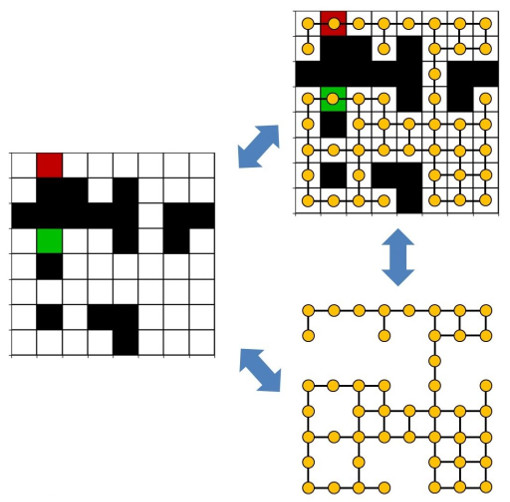

Trouver le plus court chemin, comme le montre l'illustration suivante, c'est relier le pixel de départ et le pixel d'arrivée par un circuit de la plus faible distance possible.

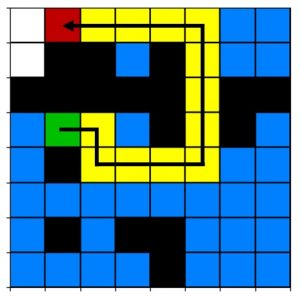

### Cas de la tondeuse:

Nous allons nous intéresser au cas où la tondeuse atteint un niveau de batterie critique et doit absolument retourner à sa station de recharge en empruntant le chemin le plus court. La base de rechargement est aux coordonnées (5,5) tandis que la tondeuse est en (80,83) comme le montre le dessin ci-dessous. La taille du pixel correspond à la largeur de coupe de la tondeuse (20cm). L'image représente donc un terrain de 120X0,2=24m de longueur et 90X0,2=18m de largeur.

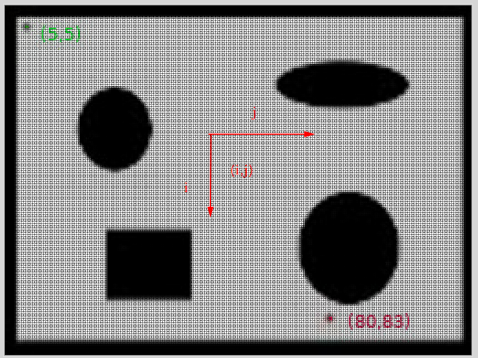

Le programme suivant permet de rechercher le plus court chemin.
Questions préliminaires:
1. Repérer les coordonnées et les ajuster aux dimensions du terrain ci-dessus.
 * 
 * 
2. En observant la structure de données utilisée pour stocker les sommets adjacents, en déduire le parcours de graphe utilisé.
 * 
 * 

3. Trouvez les sommets adjacents utilisés dans ce parcours.
 * 
 * 

Maintenant éxécuter le programme pour visualiser la recherche du plus court chemin.

### *ATTENTION:* pour fermer la fenètre opencv, appuyez sur une touche du clavier lorsque le programme est terminé.

In [ ]:
# exemple permettant de visualiser la tonte d'une pelouse
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

from queue import Queue
import cv2

start = (5,5)
end = (80,83)

def getAdjacent(n):
    i,j = n
    return [(i+1,j), (i-1,j),(i,j+1), (i,j-1)]

def BFS(start, end, pixels):
    queue = Queue()
    queue.put([start]) # Wrapping the start tuple in a list
    while not queue.empty():
        path = queue.get() 
        pixel = path[-1]
        if pixel == end:
            return path
        for adjacent in getAdjacent(pixel):
            i,j = adjacent
            if (pixels[i,j] != 0).all():
                pixels[i,j,0] = 250 # colorier avec la couleur BGR 250,250,0
                pixels[i,j,1] = 250
                pixels[i,j,2] = 0
                new_path = list(path)
                new_path.append(adjacent)
                queue.put(new_path)
                #commenter les lignes suivantes pour la rapidité
                cv2.imshow("rechercheChemin", pixels)
                cv2.waitKey(1)
    print( "Pas de chemin trouvé.")

if __name__ == "__main__":
    cv2.namedWindow("rechercheChemin", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('rechercheChemin', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    chemin = BFS(start, end, img)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(chemin))
    for position in chemin:
        i,j = position
        img[i,j,0] = 0 # colorier avec la couleur BGR 0,0,250
        img[i,j,1] = 0
        img[i,j,2] = 250   
    cv2.imshow("rechercheChemin", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

Lancer le programme suivant.
1. Expliquez rapidement les différences entre les deux programmes.
    * 
    * 
    * 

In [ ]:
# exemple permettant de visualiser la tonte d'une pelouse
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

from queue import Queue
import cv2

start = (5,5)
end = (80,83)

def getAdjacent(n):
    i,j = n
    return [(i,j+1),(i-1,j+1),(i-1,j),(i-1,j-1),(i,j-1),(i+1,j-1),(i+1,j),(i+1,j+1)]

def BFS(start, end, pixels):
    queue = Queue()
    queue.put([start]) # Wrapping the start tuple in a list
    while not queue.empty():
        path = queue.get() 
        pixel = path[-1]
        if pixel == end:
            return path
        for adjacent in getAdjacent(pixel):
            i,j = adjacent
            if (pixels[i,j] != 0).all():
                pixels[i,j,0] = 250 # colorier avec la couleur BGR 250,250,0
                pixels[i,j,1] = 250
                pixels[i,j,2] = 0
                new_path = list(path)
                new_path.append(adjacent)
                queue.put(new_path)
                #commenter les lignes suivantes pour la rapidité
                cv2.imshow("rechercheChemin", pixels)
                cv2.waitKey(1)
    print( "Pas de chemin trouvé.")

if __name__ == "__main__":
    cv2.namedWindow("rechercheChemin", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('rechercheChemin', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    chemin = BFS(start, end, img)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(chemin))
    for position in chemin:
        i,j = position
        img[i,j,0] = 0 # colorier avec la couleur BGR 0,0,250
        img[i,j,1] = 0
        img[i,j,2] = 250   
    cv2.imshow("rechercheChemin", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

Pour cet essai, nous allons changer l'ordre des sommets adjacents.
1. Pensez-vous que le chemin sera modifié? 
    *  
    *  
    
   Vérifiez vos intuitions en éxecutant le programme suivant.

In [ ]:
# exemple permettant de visualiser la tonte d'une pelouse
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

from queue import Queue
import cv2

start = (5,5)
end = (80,83)

def getAdjacent(n):
    i,j = n
    return [(i,j+1),(i-1,j-1),(i+1,j),(i-1,j+1),(i-1,j),(i+1,j+1),(i,j-1),(i+1,j-1)]

def BFS(start, end, pixels):
    queue = Queue()
    queue.put([start]) # Wrapping the start tuple in a list
    while not queue.empty():
        path = queue.get() 
        pixel = path[-1]
        if pixel == end:
            return path
        for adjacent in getAdjacent(pixel):
            i,j = adjacent
            if (pixels[i,j] != 0).all():
                pixels[i,j,0] = 250 # colorier avec la couleur BGR 250,250,0
                pixels[i,j,1] = 250
                pixels[i,j,2] = 0
                new_path = list(path)
                new_path.append(adjacent)
                queue.put(new_path)
                #commenter les lignes suivantes pour la rapidité
                cv2.imshow("rechercheChemin", pixels)
                cv2.waitKey(1)
    print( "Pas de chemin trouvé.")

if __name__ == "__main__":
    cv2.namedWindow("rechercheChemin", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('rechercheChemin', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)
    chemin = BFS(start, end, img)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(chemin))
    for position in chemin:
        i,j = position
        img[i,j,0] = 0 # colorier avec la couleur BGR 0,0,250
        img[i,j,1] = 0
        img[i,j,2] = 250   
    cv2.imshow("rechercheChemin", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

Ecrire sous forme d'algorithme les grandes étapes du programme (aidez-vous du parcours générique d'un graphe vu dans le notebook précedent).
*  
*   
*   
*   
*  
*   
*  






## Application sur notre tondeuse:
Maintenant que nous savons trouver le plus court chemin, nous pouvons déterminer le chemin permettant de recharger la tondeuse. Complétons le cahier des charges.
1. Nous voulons simuler un message de batterie faible en appuyant sur la touche du clavier (ici: Escape) pendant la tonte
2. Lorsque l'évènement apparait faire un affichage du message suivant: "Alerte! batterie faible!" (par un print).

Modifiez le programme en conséquence.

In [ ]:
# exemple permettant de visualiser la tonte d'une pelouse
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

import cv2
import time

base = 20,20# coordonnées de la base de ravitaillement
i,j = base
start = (5,5)
end = (80,83)

# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop()  
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            k = cv2.waitKey(1)
            if k == 27: #touche escape
                pass      
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j+1),(i+1,j), (i+1,j-1), (i,j-1) , (i-1,j-1)  , (i-1,j),(i-1,j+1)]
    return seen 

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)   
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

__________________________________
Lorsqu'une alerte de charge minimum apparait pendant la tonte, la tondeuse recherche le plus court chemin entre sa position actuelle et la position de la base de rechargement.
1. Modifier le programme suivant de façon à lancer une fonction ravitaillement(i,j) affichant par un print() les coordonnées actuelles de la tondeuse.



In [ ]:
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

import cv2
import time

base = 20,20# coordonnées de la base de ravitaillement
i,j = base
start = (5,5)
end = (80,83)



# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop()  #Implement DFS : use .pop()
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            k = cv2.waitKey(1)
            if k == 27: #touche escape
                pass   
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j+1),(i+1,j), (i+1,j-1), (i,j-1) , (i-1,j-1)  , (i-1,j),(i-1,j+1)]
    return seen 

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)   
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

_______________________________________
**Compléter** la fonction ravitaillement pour permettre de rechercher le chemin le plus court vers la base de chargement.

Remarque: Nous pouvons importer la recherche du plus court chemin précédente, comme le montre le code suivant.

In [ ]:
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

import sys  #code pour importer des modules de dossier extérieurs sur jupyter notebook
sys.path.insert(0, './scripts')
#import Bfs4voisinsCourtChemin as cc
import Bfs8voisinsCourtChemin as cc
import cv2
import time

base = 20,20# coordonnées de la base de ravitaillement
i,j = base
start = (5,5)
end = (80,83)

def ravitaillement(i,j):
    print("touche Escape déclenchée!")

# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop() 
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            k = cv2.waitKey(1)
            if k == 27: #touche escape
                ravitaillement(i,j)
           
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j+1),(i+1,j), (i+1,j-1), (i,j-1) , (i-1,j-1)  , (i-1,j),(i-1,j+1)]
    return seen 

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)   
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

___________________________________
## Version finale.
Compléter le programme de façon à totalement respecter le cahier des charges:
1. tonte
2. alerte charge minimum 
3. recherche et parcours du plus court chemin vers la base
4. rechargement (simuler par une petite temporisation)
5. retour sur la position de coupe
6. continuité de la tonte

In [ ]:
# exemple permettant de visualiser la tonte d'une pelouse
# installer opencv sur la machine
#https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/

import sys  #code pour importer des modules de dossier extérieurs sur jupyter notebook
sys.path.insert(0, './scripts')

#import Bfs4voisinsCourtChemin as cc
import Bfs8voisinsCourtChemin as cc
import cv2
import time

base = 20,20# coordonnées de la base de ravitaillement
i,j = base
start = (5,5)
end = (80,83)

def ravitaillement(i,j):
    print("Demande de ravitaillement!")
    start = i,j #coordonnées de la tondeuse lors de la demande de ravitaillement          
    end = base # coordonnées de la base
    print("coordonnees i: ",i," j: ",j,"end", end," start: ",start)
    img2 = cv2.imread(r"images/jardin.pnm")
    chemin = cc.BFS(start,end,img2)
    for position in chemin:
        i,j = position
        img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,250
        img[i,j,1] = 250
        img[i,j,2] = 250 
    cv2.imshow("tonte", img)
    cv2.waitKey(1)
    time.sleep(2)#animation ralentie
    #retour position tonte

    #reprise normale

# img est un tableau de pixels, i,j les coordonnées de départ suivit de la taille de l'image
def dfs(img,i,j,height,width):
    seen = []
    todo = [(i,j)]
    while todo:
        i,j = todo.pop()  #Implement DFS : use .pop()
        if (0 <= i < height) and (0 <= j < width) and (img[i,j] != 0).all() and ((i,j) not in seen):
            cv2.imshow("tonte", img)
            k = cv2.waitKey(1)
            if k == 27: #touche escape
                ravitaillement(i,j)
                
            img[i,j,0] = 0 # colorier avec la couleur BGR 0,250,0
            img[i,j,1] = 250
            img[i,j,2] = 0
            seen.append((i,j))
            todo += [(i,j+1),(i+1,j+1),(i+1,j), (i+1,j-1), (i,j-1) , (i-1,j-1)  , (i-1,j),(i-1,j+1)]
    return seen 

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm")# 90*120 pixels
    #img = cv2.resize(img, (150,133), interpolation=cv2.INTER_LINEAR)
    height, width,depth = img.shape[0], img.shape[1], img.shape[2]
    print("height: ",height," width: ",width," depth: ",depth)   
    fait = dfs(img, i, j, height,width)#i->y->lignes->height et j->x->colonnes->width
    print("taille: ",len(fait))
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

_____________________________
Bravo! La pelouse vous remercie, nous allons maintenant découvrir des algorithmes différents de recherche du plus court chemin.

____________________________________________
## Découverte d'un module python
Le module python [pathfinding](https://pypi.org/project/pathfinding/) propose 6 algorithmes de recherche du plus court chemin. Il est inspiré de [pathfinding.js](https://qiao.github.io/PathFinding.js/visual/).
1. Exécuter les 6 programmes pour compléter le tableau donnant le nombre d'opérations et la longueur du chemin trouvé.
2. faire une rapide recherche pour chaque algorithme (complexité en temps et espace mémoire dans le pire des cas si vous avez le temps).
3. Conclure sur leurs avantages et inconvénients.

|Algorithme|nb d'opérations|lg du chemin|complexité en temps|complexité en espace|
|--------------|-----------|------------|-------------------|-----------------|
|  Astar       |           |            |                   |                 |
|bestFirst     |           |            |                   |                 |
|bi_a_star     |           |            |                   |                 |
|breadth_first |           |            |                   |                 |
|dijkstra      |           |            |                   |                 |
|ida-star      |           |            |                   |                 |

In [ ]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5)
    end = grid.node(80, 83)
    finder = AStarFinder()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

*  
*  

In [ ]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.best_first import BestFirst
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5)
    end = grid.node(80, 83)
    finder = BestFirst()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

*  
*  

In [ ]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.bi_a_star import BiAStarFinder
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5) 
    end = grid.node(80, 83)
    finder = BiAStarFinder()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

*  
*  

In [ ]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.breadth_first import BreadthFirstFinder
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5)
    end = grid.node(80, 83)
    finder = BreadthFirstFinder()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

*  
*  

In [ ]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.dijkstra import DijkstraFinder
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5)
    end = grid.node(80, 83)
    finder = DijkstraFinder()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()

*  
*  

In [ ]:
from pathfinding.core.diagonal_movement import DiagonalMovement
from pathfinding.core.grid import Grid
from pathfinding.finder.ida_star import IDAStarFinder
import cv2

if __name__ == "__main__":
    cv2.namedWindow("tonte", cv2.WINDOW_NORMAL)
    cv2.resizeWindow('tonte', 800, 600)#largeur,hauteur
    img = cv2.imread(r"images/jardin.pnm",0)# 90*120 pixels niveau de gris
    ret, img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY) # image noire et blanc
    grid = Grid(matrix=img)
    #print(grid.height, grid.width)
    start = grid.node(5, 5)
    end = grid.node(80, 83)
    finder = IDAStarFinder()
    path, runs = finder.find_path(start, end, grid)
    print('operations:', runs, 'path length:', len(path))
    for position in path:
        i,j = position
        img[i,j] = 125 # colorier en gris
    cv2.imshow("tonte", img)
    cv2.waitKey(0)#attend appui touche
    cv2.destroyAllWindows()